## The script fetches Apple’s quarterly financials and directly visualizes Gross Margin related indicators using `matplotlib`.

### Check the trends of indicators like **Gross Profit** over time:

*  Uses Prophet with linear growth and multiplicative seasonality.
*  Pulls real Gross Profit data directly from Yahoo Finance.
*  Predicts 2 years ahead (8 quarters).
*  Visualizes both the full forecast and seasonal/trend components.





Install the required package if needed

In [ ]:
pip install yfinance

Import relevant libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

Download financial data for Apple (focus: Gross Profit)

In [3]:
ticker = yf.Ticker("AAPL")
financials = ticker.quarterly_financials.T.reset_index()
financials.rename(columns={'index': 'Date'}, inplace=True)
financials['Date'] = pd.to_datetime(financials['Date'])

Filter and prepare the Gross Profit series

In [4]:
if 'Gross Profit' not in financials.columns:
    raise KeyError("Gross Profit column not found in the financial data.")

df = financials[['Date', 'Gross Profit']].rename(columns={'Date': 'ds', 'Gross Profit': 'y'})
df = df.sort_values('ds')
df['y'] = df['y'].astype(float)

Fit Prophet model

In [ ]:
model = Prophet(growth='linear', seasonality_mode='multiplicative')
model.fit(df)

Forecast 8 quarters into the future

In [ ]:
future = model.make_future_dataframe(periods=8, freq='Q')
forecast = model.predict(future)

Plot results

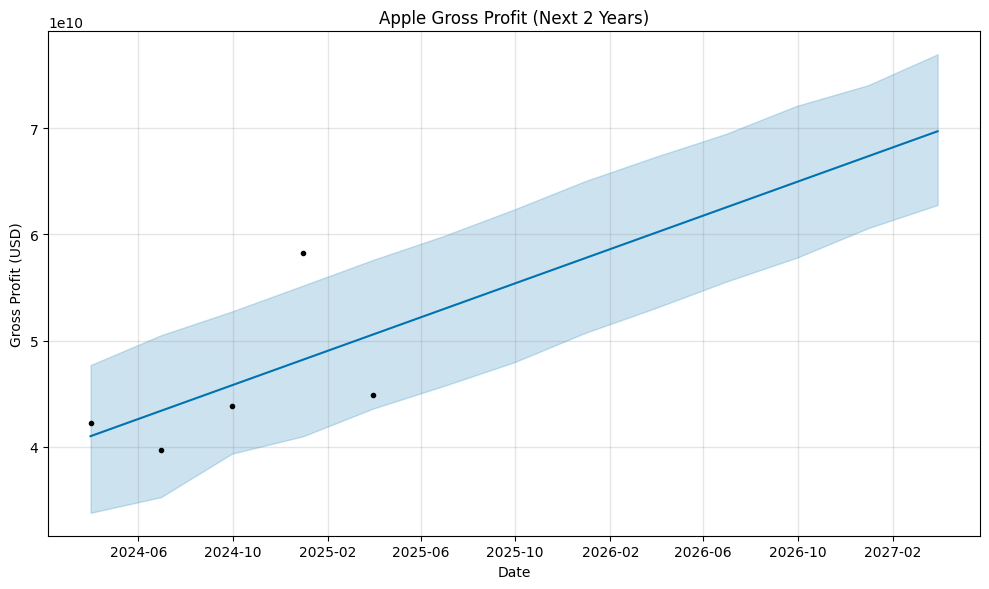

In [7]:
fig1 = model.plot(forecast)
plt.title('Apple Gross Profit (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Gross Profit (USD)')
plt.tight_layout()
plt.show()

Trend and components

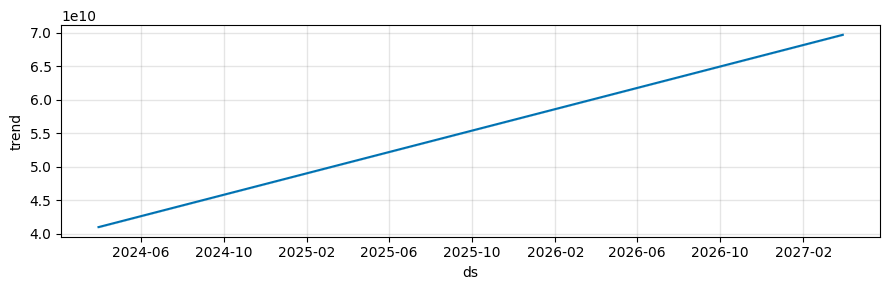

In [8]:
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

Thee predictions show a reasonable upward trend in line with Apple's recent
performance. The magnitude of the predicted values aligns with Apple's quarterly gross profits.

---

# Disclaimer:

* The linear projection might be an oversimplification for quarterly data, as Apple's gross profit experiences seasonal peaks (e.g., around Q4/holiday season). A more sophisticated model might capture this seasonality.

* Long-term forecasts are always subject to significant uncertainty. Factors like new product cycles, competition, global economic conditions, and supply chain issues can significantly impact Apple's actual gross profit.

# Key observations from the images:

* Trend: A clear upward linear trend is predicted.

* Scale: The y-axis is in USD, ranging from $3.5 \times 10^{10}$
  to $7.5 \times 10^{10}$, meaning tens of billions of dollars.

* Data Points: The black dots in the first image represent historical or observed data points, showing some variability but generally aligning with an upward trajectory.

Comparing with Real-World Apple Gross Profit Data
The predictions in the provided images show Apple's gross profit increasing linearly over the next two years, from approximately 40 billion USD dollars in mid-2024 to nearly 70 billion by early 2027. Let's analyze if this makes financial sense based on available information:

**Comparing with Real-World Apple Gross Profit Data**, from Macrotrends and Finbox:

* **Annual Gross Profit**: Apple's annual gross profit has been steadily increasing. For example, it was 169.1 billion USD dollars in 2023 and 180.7 billion in 2024. For the twelve months ending March 31, 2025, it was 186.7 billion.

* **Quarterly Gross Profit**: Apple's quarterly gross profit fluctuates, with a notable peak in the December quarter (holiday season). For instance:

  * March 2025: $44.87 billion

  * December 2024: $58.28 billion

  * September 2024: $43.88 billion

  * June 2024: $39.68 billion

* **Growth**: Apple's gross profit growth has been positive, with the latest twelve months (ending March 2025) showing a 7.32% increase year-over-year.

# Analysis of the Predictions:

1. **Magnitude**: The predicted gross profit values (ranging from 40 billion USD to 70 billion per quarter/period) are in the general ballpark of Apple's quarterly gross profits. For example, the predicted value for early 2027 of aprox. $70 billion aligns with the higher end of Apple's quarterly gross profits (like the December quarter).

2. **Trend**: A continuous upward trend in gross profit for a company like Apple is plausible, given its strong market position, recurring services revenue, and continued product innovation. While there will be quarterly fluctuations (which the linear model might smooth out), the overall direction could be positive.

3. **Linearity**: The model presents a very clean linear increase. In reality, Apple's gross profit, especially quarterly, is subject to seasonality (e.g., higher in holiday quarters) and various market factors, which would likely result in more fluctuations around a trend line rather than a perfectly smooth line. The black dots in the first image do show some of this variability around the trend.

4. **Confidence Interval**: The shaded area in the first graph represents a confidence interval, suggesting the actual values could fall within that range. This acknowledges the inherent uncertainty in financial forecasting.